In [1]:
#### decision tree assignment ### fraud detection ##

In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 


In [3]:
fraud= pd.read_csv("Fraud_check.csv")

In [4]:
fraud

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,TaxableIncome
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,76340
596,YES,Divorced,55369,2,YES,69967
597,NO,Divorced,154058,0,YES,47334
598,YES,Married,180083,17,NO,98592


In [5]:
fraud['TaxableIncome'] = pd.cut(fraud.TaxableIncome,bins=(0,30000,199778),labels=['Risky','Good'])
fraud

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban,TaxableIncome
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [6]:
fraud.describe()

,CityPopulation,WorkExperience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [7]:
fraud.shape

(600, 6)

In [8]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Undergrad       600 non-null    object  
 1   MaritalStatus   600 non-null    object  
 2   CityPopulation  600 non-null    int64   
 3   WorkExperience  600 non-null    int64   
 4   Urban           600 non-null    object  
 5   TaxableIncome   600 non-null    category
dtypes: category(1), int64(2), object(3)
memory usage: 24.2+ KB


In [9]:
fraud.isnull().sum()

Undergrad         0
MaritalStatus     0
CityPopulation    0
WorkExperience    0
Urban             0
TaxableIncome     0
dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

In [11]:
x= fraud.iloc[:,:-1]

In [12]:
x

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban
0,NO,Single,50047,10,YES
1,YES,Divorced,134075,18,YES
2,NO,Married,160205,30,YES
3,YES,Single,193264,15,YES
4,NO,Married,27533,28,NO
...,...,...,...,...,...
595,YES,Divorced,39492,7,YES
596,YES,Divorced,55369,2,YES
597,NO,Divorced,154058,0,YES
598,YES,Married,180083,17,NO


In [42]:
y = fraud.iloc[:,5]
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxableIncome, Length: 600, dtype: category
Categories (2, object): [Risky < Good]

In [14]:
labelencoder_x=LabelEncoder()

In [15]:
x=x.apply(LabelEncoder().fit_transform)

In [41]:
x

,Undergrad,MaritalStatus,CityPopulation,WorkExperience,Urban
0,0,2,84,10,1
1,1,0,398,18,1
2,0,1,481,30,1
3,1,2,574,15,1
4,0,1,4,28,0
...,...,...,...,...,...
595,1,0,55,7,1
596,1,0,107,2,1
597,0,0,459,0,1
598,1,1,533,17,0


In [17]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [18]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

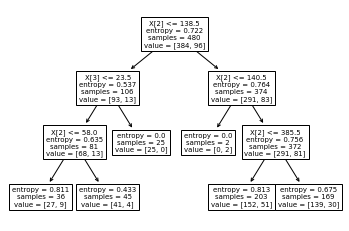

In [19]:
#PLot the decision tree
tree.plot_tree(model);


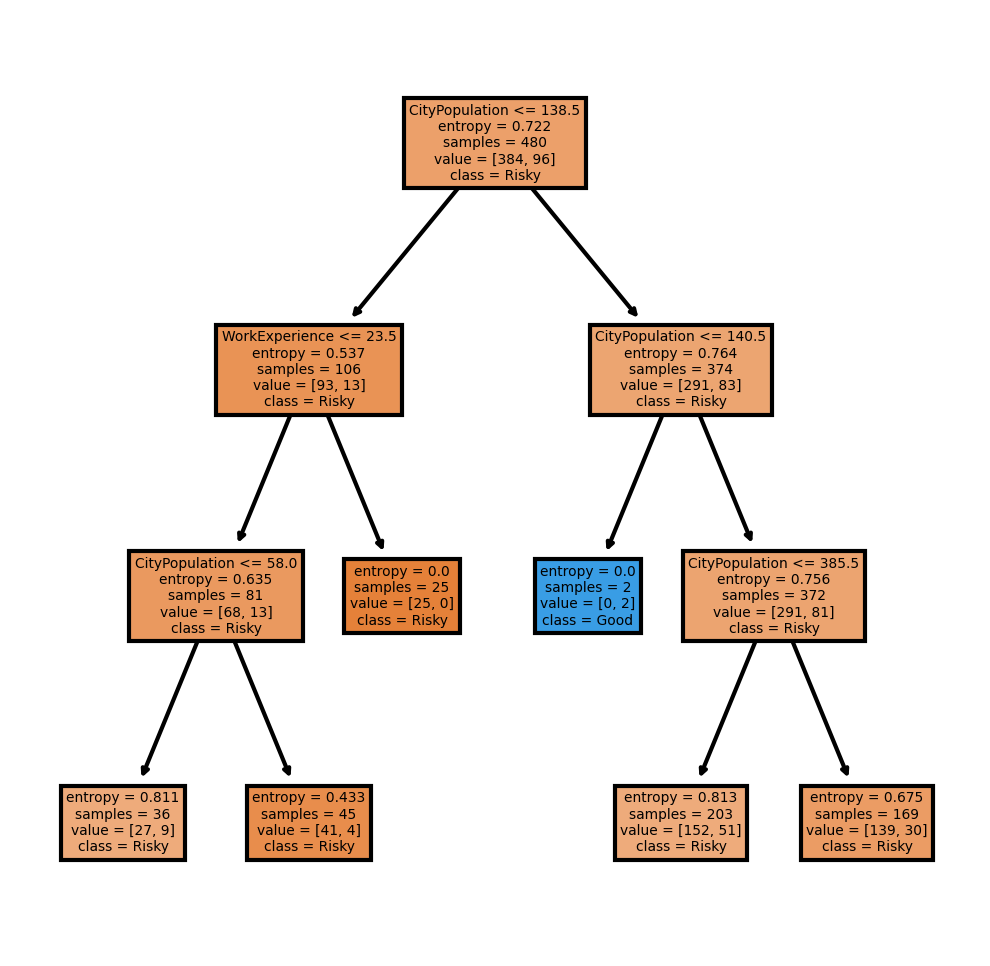

In [20]:
fn=['Undergrad','MaritalStatus','CityPopulation','WorkExperience','Urban']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True); 

In [21]:
model.feature_importances_ 

array([0.        , 0.        , 0.71003667, 0.28996333, 0.        ])

In [22]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

CityPopulation    0.710037
WorkExperience    0.289963
Urban             0.000000
MaritalStatus     0.000000
Undergrad         0.000000
dtype: float64

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


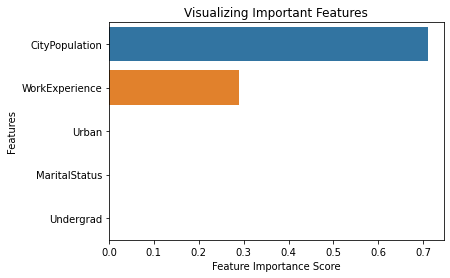

In [24]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [25]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

Good    120
dtype: int64

In [26]:
preds 

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [27]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,Good
TaxableIncome,
Risky,28
Good,92


In [28]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

In [29]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [31]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
pred=model.predict(x_test)
np.mean(preds==y_test) 

0.7666666666666667

In [33]:
model.feature_importances_ 

array([0.        , 0.        , 0.71003667, 0.28996333, 0.        ])